In [1]:
%matplotlib inline

# Import a bunch of libraries.
import time
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

# some PCA and GMM stuff
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

import sklearn.ensemble as ske
from sklearn.feature_selection import SelectFromModel

In [2]:
dtypes = {
        'MachineIdentifier':                                    'str',
        'ProductName':                                          'str',
        'EngineVersion':                                        'str',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', 
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', 
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', 
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', 
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', 
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', 
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', 
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', 
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', 
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [3]:
if not (path.exists("data/mini_initial.csv")):
    train_df = pd.read_csv("data/train.csv", dtype=dtypes)
    train_labels = train_df['HasDetections']
    train_ids = train_df['MachineIdentifier']
    train_data = train_df.drop(columns=['HasDetections', 'MachineIdentifier']) 
    train_data.sample(100000, random_state=123).to_csv("data/mini_initial.csv")


In [6]:
display(train_data.head())
print(len(train_data))

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,...,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,...,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,...,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,...,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,1.0,...,355.0,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0


8921483


281483566841860
[1, 2, 3, 4]


In [37]:
df = pd.read_csv("data/mini_initial.csv", dtype=dtypes) 
df.head()

,Unnamed: 0,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,3082108,win8defender,1.1.15100.1,4.18.1806.18062,1.273.520.0,0,7.0,0,NaN,53447.0,...,628.0,27767.0,1,NaN,0.0,0,0,0.0,1.0,15.0
1,3553333,win8defender,1.1.15200.1,4.18.1807.18075,1.275.453.0,0,7.0,0,NaN,7945.0,...,500.0,14353.0,0,NaN,0.0,0,0,0.0,0.0,10.0
2,6768315,win8defender,1.1.15100.1,4.18.1807.18075,1.273.689.0,0,7.0,0,NaN,53447.0,...,628.0,8941.0,1,NaN,0.0,0,0,0.0,1.0,1.0
3,7098147,win8defender,1.1.15200.1,4.12.16299.15,1.275.483.0,0,7.0,0,NaN,68585.0,...,142.0,46589.0,1,NaN,0.0,0,0,0.0,1.0,7.0
4,716616,win8defender,1.1.15200.1,4.18.1807.18075,1.275.215.0,0,7.0,0,NaN,53447.0,...,142.0,52530.0,0,NaN,0.0,0,0,0.0,NaN,NaN


In [49]:
#
# the real data wrangling:
#

df = pd.read_csv("data/mini_initial.csv", dtype=dtypes) 

#
# deal with version numbers
#

def map_version(df, col):
    df[col+'_major'] = df[col].map(lambda x: np.fromstring(x, sep=".", dtype=np.uint8)[0])
    df[col+'_minor'] = df[col].map(lambda x: np.fromstring(x, sep=".", dtype=np.uint8)[1])
    df[col+'_build1'] = df[col].map(lambda x: np.fromstring(x, sep=".", dtype=np.uint16)[2])
    df[col+'_build2'] = df[col].map(lambda x: np.fromstring(x, sep=".", dtype=np.uint16)[2])
    return df.drop(columns=[col])


df = map_version(df, "EngineVersion")
df = map_version(df, "AppVersion")
df = map_version(df, "AvSigVersion")


#
# encode the four values of RtpStateBitfield (NaN, 0, 7, 8) as 01,2,3
#

df["RtpReduced"] = df["RtpStateBitfield"].map(lambda x: 0 if np.isnan(x) else {0:1, 7:2, 8:3}[x])


df.head()
                                    

KeyError: 1.0

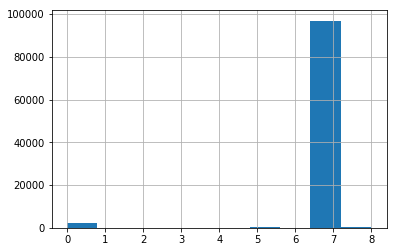

In [43]:
df["RtpStateBitfield"].hist()